In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
df = pd.read_csv('Data/uspopulation.csv',index_col = 0,parse_dates=True)

In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


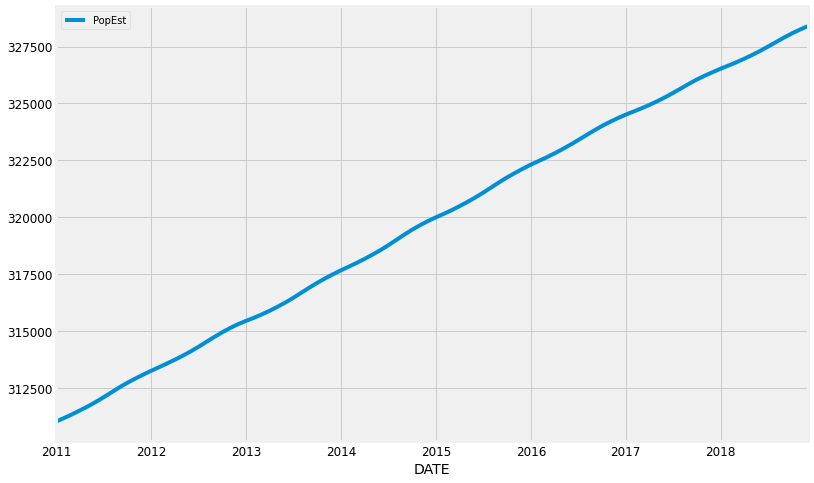

In [6]:
df.plot(figsize = (12,8));
# no seasonal

In [7]:
len(df)

96

In [8]:
train = df.iloc[:84]
test = df.iloc[84:] # 1 year

In [9]:
model = AR(train['PopEst'])

In [10]:
AR1fit = model.fit(maxlag = 1)

In [11]:
AR1fit.k_ar

1

In [12]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [13]:
start = len(train)
end = len(train) + len(test)  -1

In [14]:
start,end

(84, 95)

In [15]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [16]:
AR1fit.predict(start = start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
pred1 = AR1fit.predict(start = start,end=end)

In [19]:
pred1 = pred1.rename('AR(1) predictions')

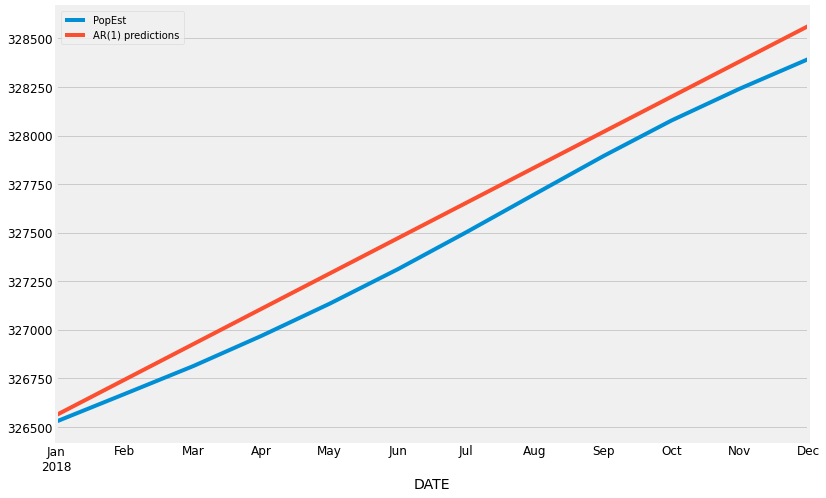

In [20]:
test.plot(figsize = (12,8),legend = True)
pred1.plot(legend  = True);

In [21]:
model2 = AR(train['PopEst'])
AR2fit = model2.fit(maxlag = 2)

In [22]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [23]:
pred2 = AR2fit.predict(start = start,end=end)

In [24]:
pred2 = pred2.rename('AR(2) predictions')

In [25]:
pred2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882249
2018-04-01    327015.944947
2018-05-01    327177.719497
2018-06-01    327340.045893
2018-07-01    327502.787327
2018-08-01    327665.826842
2018-09-01    327829.064475
2018-10-01    327992.414803
2018-11-01    328155.804852
2018-12-01    328319.172299
Freq: MS, Name: AR(2) predictions, dtype: float64

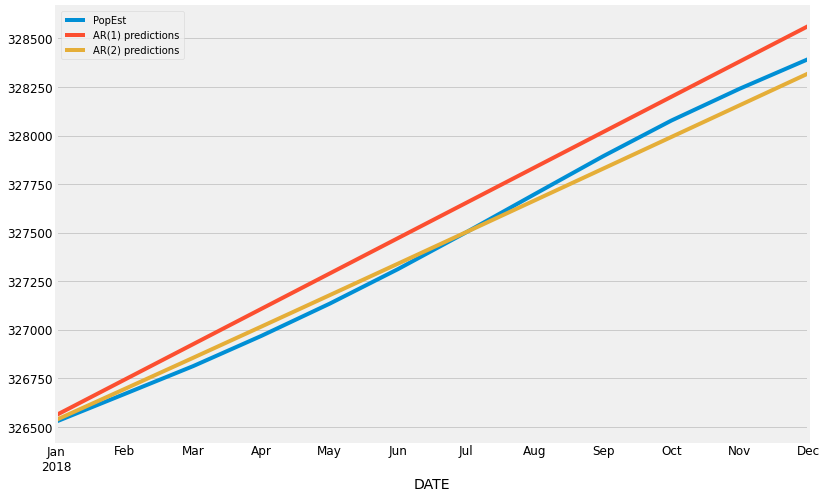

In [26]:
test.plot(figsize = (12,8),legend = True)
pred1.plot(legend  = True)
pred2.plot(legend  = True);

# How to get the correct order value(p) ?

In [27]:
mod = AR(train['PopEst'])


In [28]:
ARfit = mod.fit(ic ='t-stat') # ic = information critria

In [29]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [30]:
pred8 = ARfit.predict(start,end)
pred8 = pred8.rename('AR(8) Predictions')

In [31]:
labels = ['AR1','AR2','AR8']


In [32]:
pred = [pred1,pred2,pred8]

In [33]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],pred[i])
    print(labels[i],error)

AR1 17449.714242014332
AR2 2713.258956718333
AR8 186.96945419794508


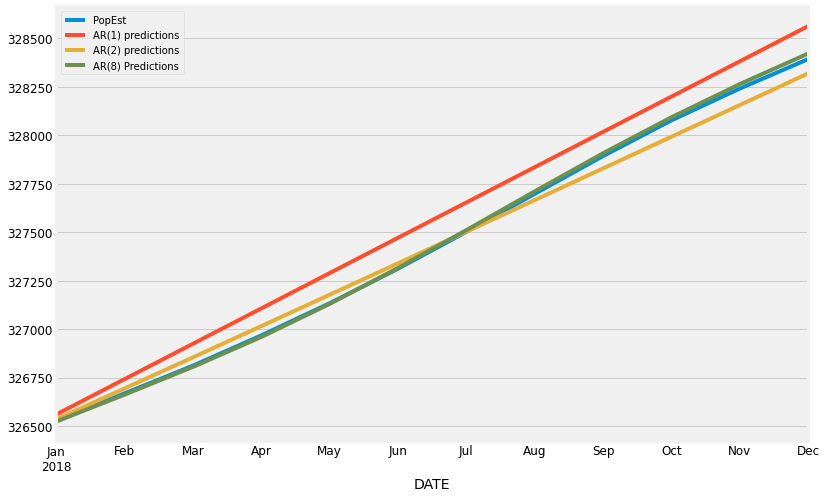

In [34]:
test.plot(figsize = (12,8),legend = True)
pred1.plot(legend  = True)
pred2.plot(legend  = True)
pred8.plot(legend = True);

In [38]:
model_fut = AR(df['PopEst'])
ARfit = model_fut.fit()
forecasted_values = ARfit.predict(start = len(df),end = len(df)+24).rename('forecast')

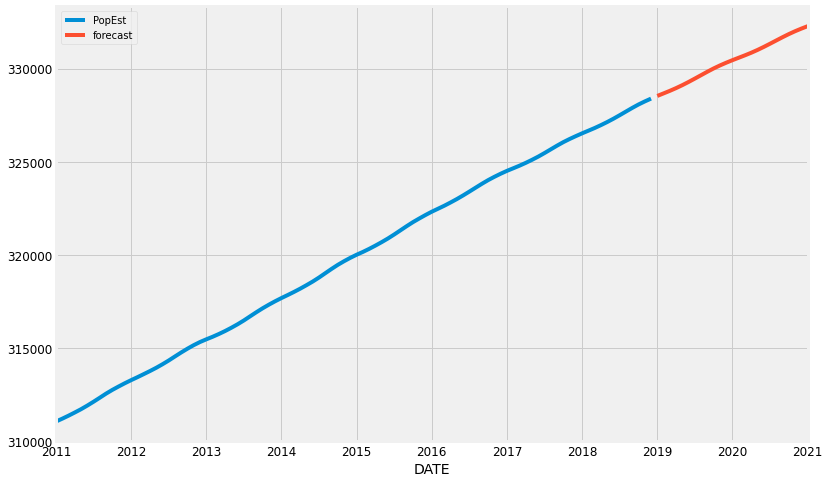

In [39]:
df['PopEst'].plot(figsize = (12,8),legend = True)
forecasted_values.plot(legend=True);